In [2]:
# Colab only
# !pip install rarfile

In [1]:
import rarfile
import zipfile
import io
import csv

def readline_csv_from_zip_rar(zip_rar_file_path, zip_file_name, rar_file_name):
    with zipfile.ZipFile(zip_rar_file_path, 'r') as zip_file:
        # Check if the RAR file exists in the ZIP archive
        if zip_file_name in zip_file.namelist():
            with zip_file.open(zip_file_name, 'r') as rar_bytes:
                rar_buffer = io.BytesIO(rar_bytes.read())
                with rarfile.RarFile(rar_buffer) as rar_file:
                    # Check if the CSV file exists in the RAR archive
                    if rar_file_name in rar_file.namelist():
                        with rar_file.open(rar_file_name, 'r') as csv_file:
                            csv_reader = csv.reader(io.TextIOWrapper(csv_file, 'utf-8'))
                            for row in csv_reader:
                                yield row
                    else:
                        print(f"RAR file '{rar_file_name}' not found in the ZIP archive.")
        else:
            print(f"ZIP file '{zip_file_name}' not found in the ZIP archive.")

def read_csv_from_rar(rar_file_path, rar_file_name):
    with rarfile.RarFile(rar_file_path) as rar_file:
        # Check if the CSV file exists in the RAR archive
        if rar_file_name in rar_file.namelist():
            with rar_file.open(rar_file_name, 'r') as csv_file:
                csv_reader = csv.reader(io.TextIOWrapper(csv_file, 'utf-8'))
                for row in csv_reader:
                    yield row
        else:
            print(f"RAR file '{rar_file_name}' not found in the ZIP archive.")

def list_files_inzip(zip_file_path):
    print(zipfile.ZipFile(zip_file_path, 'r').namelist())

def list_files_inzip_rar(zip_file_path, rar_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
        # Check if the RAR file exists in the ZIP archive
        if rar_file_path in zip_file.namelist():
            with zip_file.open(rar_file_path, 'r') as rar_bytes:
                rar_buffer = io.BytesIO(rar_bytes.read())
                namelist = []
                try:
                    namelist = rarfile.RarFile(rar_buffer).namelist()
                except:
                    print(f"Error reading RAR file '{rar_file_path}' in the ZIP archive.")    
                return namelist
        else:
            print(f"ZIP file '{rar_file_path}' not found in the ZIP archive.")
            return []


In [4]:
# Colab only
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Colab vs local
# droneRF_path = 'drive/MyDrive/LA - Course Project/Scanner data/droneRF.zip'
droneRF_path = 'Data/droneRF.zip'

list_files_inzip(droneRF_path)

rar_file_path = 'DroneRF/AR drone/RF Data_10110_L.rar'

print(list_files_inzip_rar(droneRF_path, rar_file_path))

['DroneRF/', '__MACOSX/._DroneRF', 'DroneRF/Background RF activites/', '__MACOSX/DroneRF/._Background RF activites', 'DroneRF/Bepop drone/', '__MACOSX/DroneRF/._Bepop drone', 'DroneRF/Phantom drone/', '__MACOSX/DroneRF/._Phantom drone', 'DroneRF/AR drone/', '__MACOSX/DroneRF/._AR drone', 'DroneRF/Background RF activites/RF Data_00000_H1.rar', '__MACOSX/DroneRF/Background RF activites/._RF Data_00000_H1.rar', 'DroneRF/Background RF activites/RF Data_00000_L1.rar', '__MACOSX/DroneRF/Background RF activites/._RF Data_00000_L1.rar', 'DroneRF/Background RF activites/RF Data_00000_L2.rar', '__MACOSX/DroneRF/Background RF activites/._RF Data_00000_L2.rar', 'DroneRF/Background RF activites/FR Data_00000_H2.rar', '__MACOSX/DroneRF/Background RF activites/._FR Data_00000_H2.rar', 'DroneRF/Bepop drone/RF Data_10011_H.rar', '__MACOSX/DroneRF/Bepop drone/._RF Data_10011_H.rar', 'DroneRF/Bepop drone/RF Data_10011_L.rar', '__MACOSX/DroneRF/Bepop drone/._RF Data_10011_L.rar', 'DroneRF/Bepop drone/RF D

In [6]:
import numpy as np

def read_csv_from_zip_rar(droneRF_path, rar_file_path, zip_file_name):
  numbers_array = []
  i = 0
  for row in readline_csv_from_zip_rar(droneRF_path, rar_file_path, zip_file_name):
      # Process each row here
      for item in row:
          try:
              numbers_array.append(float(item))
              i += 1
          except ValueError:
              pass
  return numbers_array

In [7]:
from scipy.signal import welch
from scipy.fftpack import fft
import matplotlib.pyplot as plt

def plot_welch(np_numbers_array):
  sample_rate = 40e+06
  t = np.linspace(0, 10, num=np_numbers_array.shape[0])

  # Compute PSD using Welch method
  frequencies, psd = welch(np_numbers_array, sample_rate, nperseg=1024)

  # Plot the original signal
  plt.figure(figsize=(10, 6))
  plt.subplot(2, 1, 1)
  plt.plot(t, np_numbers_array)
  plt.title('Original Signal')
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')

  # Plot the Power Spectral Density
  plt.subplot(2, 1, 2)
  plt.semilogy(frequencies, psd)
  plt.title('Power Spectral Density (PSD)')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Power/Frequency (dB/Hz)')

  plt.tight_layout()
  plt.show()


Min:-2104.0, Max:2295.0


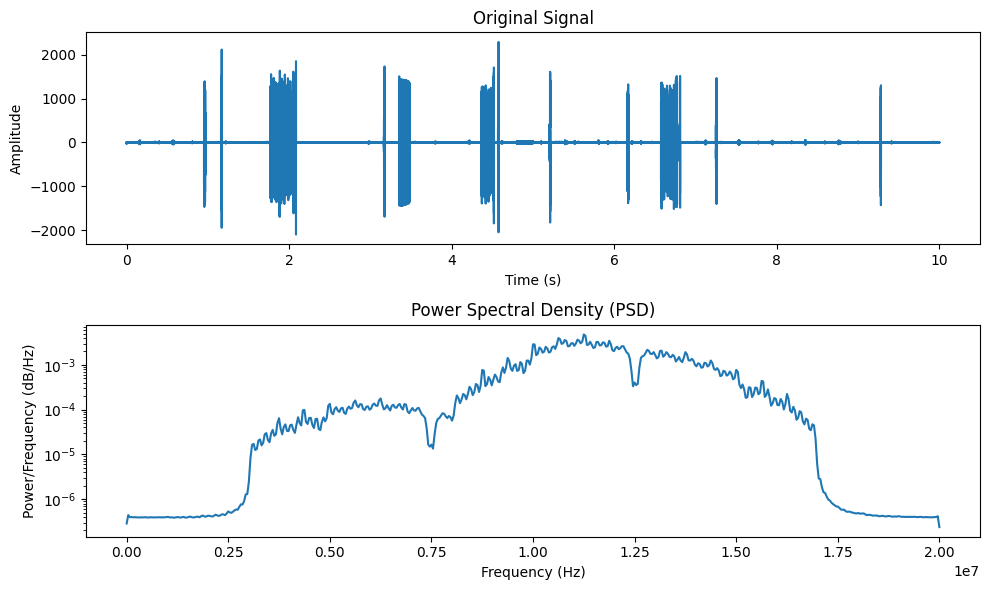

In [8]:
zip_file_name = 'RF Data_10110_L/10110L_0.csv'
np_numbers_array = np.array(read_csv_from_zip_rar(droneRF_path, rar_file_path, zip_file_name))

print(f'Min:{np_numbers_array.min()}, Max:{np_numbers_array.max()}')

plot_welch(np_numbers_array)


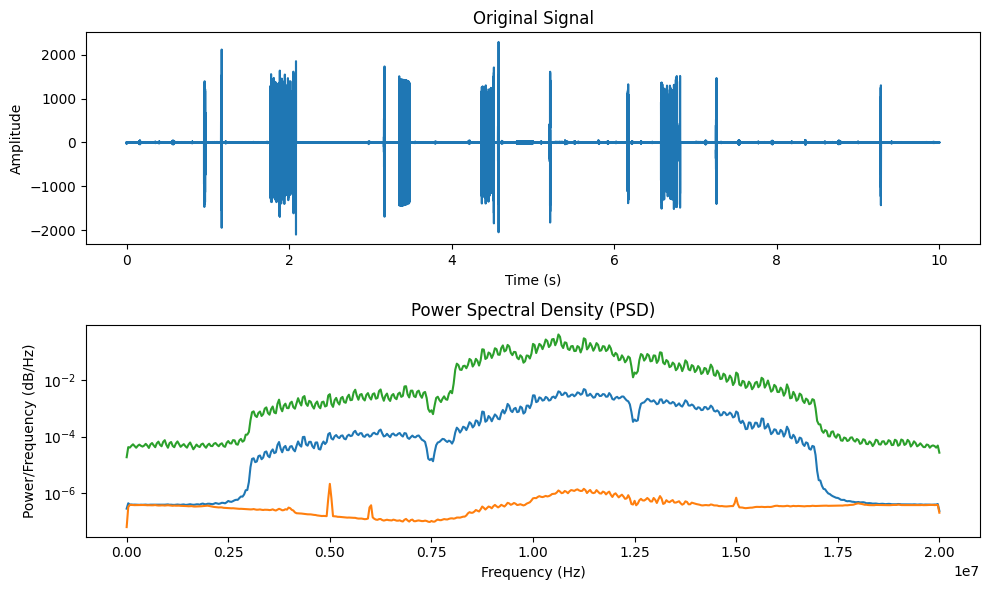

In [9]:
sample_rate = 40e+06
t = np.linspace(0, 10, num=np_numbers_array.shape[0])

rar_file_path = 'DroneRF/Background RF activites/RF Data_00000_L1.rar'
list_files_inzip_rar(droneRF_path, rar_file_path)
zip_file_name = 'RF Data_00000_L1/00000L_0.csv'
np_numbers_array_2 = np.array(read_csv_from_zip_rar(droneRF_path, rar_file_path, zip_file_name))

frequencies, psd = welch(np_numbers_array, sample_rate, nperseg=1024)
frequencies_2, psd_2 = welch(np_numbers_array_2, sample_rate, nperseg=1024)

rar_file_path = 'DroneRF/Bepop drone/RF Data_10001_L.rar'
list_files_inzip_rar(droneRF_path, rar_file_path)
zip_file_name = 'RF Data_10001_L/10001L_10.csv'
np_numbers_array_3 = np.array(read_csv_from_zip_rar(droneRF_path, rar_file_path, zip_file_name))

frequencies_3, psd_3 = welch(np_numbers_array_3, sample_rate, nperseg=1024)

# Plot the original signal
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, np_numbers_array)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the Power Spectral Density
plt.subplot(2, 1, 2)
plt.semilogy(frequencies, psd)
plt.semilogy(frequencies_2, psd_2)
plt.semilogy(frequencies_3, psd_3)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')

plt.tight_layout()
plt.show()

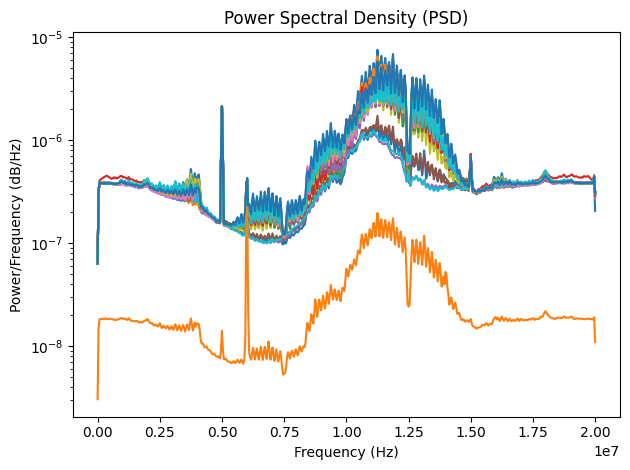

In [10]:
all_numbers_array = []

all_rars = zipfile.ZipFile(droneRF_path, 'r').namelist()
ar_drone_rars = np.array([s for s in all_rars if 'Background RF activites' in s and '_L' in s])

rar_file_path = ar_drone_rars[0]
csvs = np.array([s for s in list_files_inzip_rar(droneRF_path, rar_file_path) if '.csv' in s])

for csv_object in csvs:
  numbers_array = read_csv_from_zip_rar(droneRF_path, rar_file_path, csv_object)
  all_numbers_array.append(numbers_array)
  np_numbers_array = np.array(numbers_array)
  frequencies, psd = welch(np_numbers_array, sample_rate, nperseg=1024)
  plt.semilogy(frequencies, psd, label = csv_object)

np_numbers_array = np.mean(np.array(all_numbers_array), axis=0)
frequencies, psd = welch(np_numbers_array, sample_rate, nperseg=1024)

plt.semilogy(frequencies, psd, label = 'mean')
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')

#plt.legend()
plt.tight_layout()
plt.show()

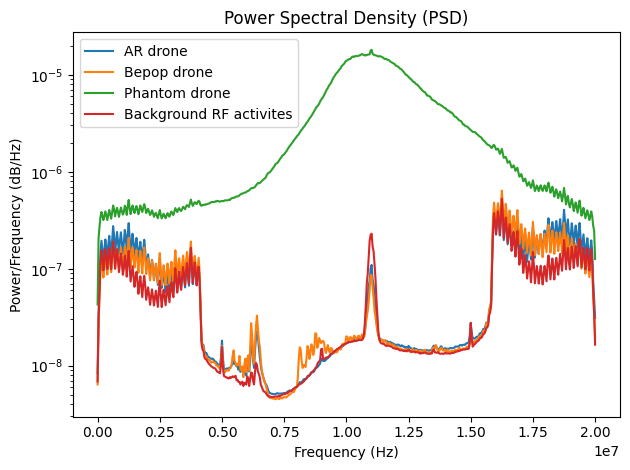

In [49]:
def plot_psd():
  def averaged_welch(drone_type):
    all_numbers_array = []

    all_rars = zipfile.ZipFile(droneRF_path, 'r').namelist()
    ar_drone_rars = np.array([s for s in all_rars if drone_type in s and '_H' in s])

    rar_file_path = ar_drone_rars[0]
    csvs = np.array([s for s in list_files_inzip_rar(droneRF_path, rar_file_path) if '.csv' in s])

    for csv_object in csvs:
      numbers_array = read_csv_from_zip_rar(droneRF_path, rar_file_path, csv_object)
      all_numbers_array.append(numbers_array)

    np_numbers_array = np.mean(np.array(all_numbers_array), axis=0)
    return welch(np_numbers_array, sample_rate, nperseg=1024)

  drone_types = ['AR drone', 'Bepop drone', 'Phantom drone', 'Background RF activites']
  for drone_type in drone_types:
    frequencies, psd = averaged_welch(drone_type)
    plt.semilogy(frequencies, psd, label = drone_type)

  plt.title('Power Spectral Density (PSD)')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Power/Frequency (dB/Hz)')

  plt.legend()
  plt.tight_layout()
  plt.show()

plot_psd()

In [12]:
def all_numbers(drone_type):
  all_numbers_array = []

  all_rars = zipfile.ZipFile(droneRF_path, 'r').namelist()
  ar_drone_rars = np.array([s for s in all_rars if drone_type in s and '_H' in s])

  rar_file_path = ar_drone_rars[0]
  csvs = np.array([s for s in list_files_inzip_rar(droneRF_path, rar_file_path) if '.csv' in s])

  for csv_object in csvs:
    numbers_array = read_csv_from_zip_rar(droneRF_path, rar_file_path, csv_object)
    all_numbers_array.append(numbers_array)

  return np.array(all_numbers_array)

def psds(drone_type):
  all_psds = []

  all_files = zipfile.ZipFile(droneRF_path, 'r').namelist()
  rars = np.array([s for s in all_rars if '.rar' in s and '_H' in s and drone_type in s])

  for rar_file_path in rars:
    csvs = np.array([s for s in list_files_inzip_rar(droneRF_path, rar_file_path) if '.csv' in s])

    for csv_object in csvs:
      numbers_array = read_csv_from_zip_rar(droneRF_path, rar_file_path, csv_object)
      _, psd = welch(numbers_array, sample_rate, nperseg=1024)      
      all_psds.append(psd)
      print(f'Added: {rar_file_path} - {csv_object}')
  
  return np.array(all_psds)

In [13]:
# Apply ICA
all_psds = psds('AR drone')

# Mean removal
all_psds_prep = all_psds - all_psds.mean(axis=0)

#Normalization
all_psds_prep = all_psds_prep / all_psds_prep.std(axis=0)

Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_0.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_1.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_10.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_11.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_12.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_13.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_14.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_15.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_16.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_17.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_2.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_3.csv
Added: DroneRF/AR drone/RF Data_10111_H.rar - RF Data_10111_H/10111H_4.csv
Added: DroneRF/AR

In [50]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

ica = FastICA(n_components=all_psds_prep.shape[0]-1, algorithm='parallel', whiten='unit-variance')
independent_components = ica.fit_transform(all_psds_prep)

kurtosis_scores = [kurtosis(independent_components[:, i]) for i in range(independent_components.shape[1])]
n_components = np.argmax(kurtosis_scores) + 1

print(f'Optimal number of components: {n_components} ({all_psds_prep.shape[0]})')

(81, 513)
Optimal number of components: 54 (81)


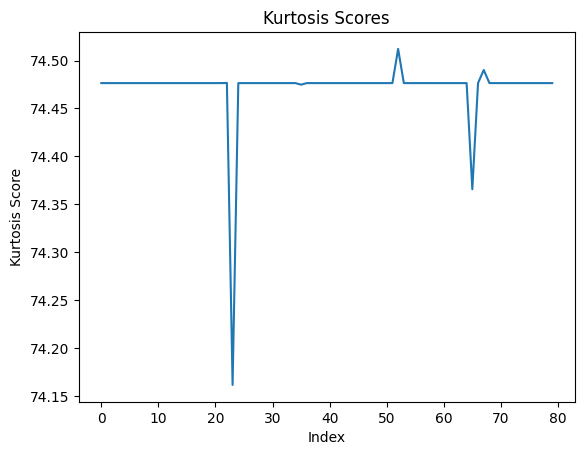

In [35]:
import matplotlib.pyplot as plt

plt.plot(kurtosis_scores)
plt.xlabel('Index')
plt.ylabel('Kurtosis Score')
plt.title('Kurtosis Scores')
plt.show()


In [44]:
ica = FastICA(n_components=n_components, algorithm='parallel', whiten='unit-variance')
independent_components = ica.fit_transform(all_psds_prep)

print(independent_components.shape)

(81, 53)


In [51]:
def fastICA(X, n_components, max_iter=1000, tol=1e-5):
    # G: tanh
    def g1(x): 
        return np.tanh(x)

    # G': derivative of tanh
    def g2(x):
        return np.ones(x.shape) - np.power(np.tanh(x), 2)

    N = X.shape[0]

    # Centering matrix X
    mean = X.mean(axis=1)
    X = X - (mean.reshape((N, 1)) @ np.ones((1, X.shape[1])))

    # Whitening matrix X
    D, E = np.linalg.eigh(X @ X.T)
    DE = np.diag(1/np.sqrt(D + 1e-5)) @ E.T
    X = DE @ X
    
    W = np.zeros((n_components, N))

    for i in range(n_components):
        wp = np.random.rand(1, N)
        for j in range(max_iter):
            t1 = np.mean((X @ g1(wp @ X).T), axis=1)
            t2 = np.mean(g2(wp @ X), axis=1) * wp
            wp = t1 - t2

            wp = wp - ((wp @ W[:i,:].T) @ W[:i,:]) # Deflationary orthogonalization
            wp = wp / np.linalg.norm(wp) # Normalize wp            
            
            if np.linalg.norm(wp - W[i,:]) < tol:  # Check tolerance
                print(f'Converged at {j} iteration on {i+1} component')
                break

            W[i,:] = wp

    return W @ X


def kurt(X):
    n = np.shape(X)[0]
    mean = np.sum((X**1)/n) # Calculate the mean
    var = np.sum((X-mean)**2)/n # Calculate the variance
    skew = np.sum((X-mean)**3)/n # Calculate the skewness
    kurt = np.sum((X-mean)**4)/n # Calculate the kurtosis
    kurt = kurt/(var**2)-3

    return kurt, skew, var, mean

In [52]:
independent_components = fastICA(all_psds_prep.T, n_components)

print(independent_components.shape)

(54, 81)


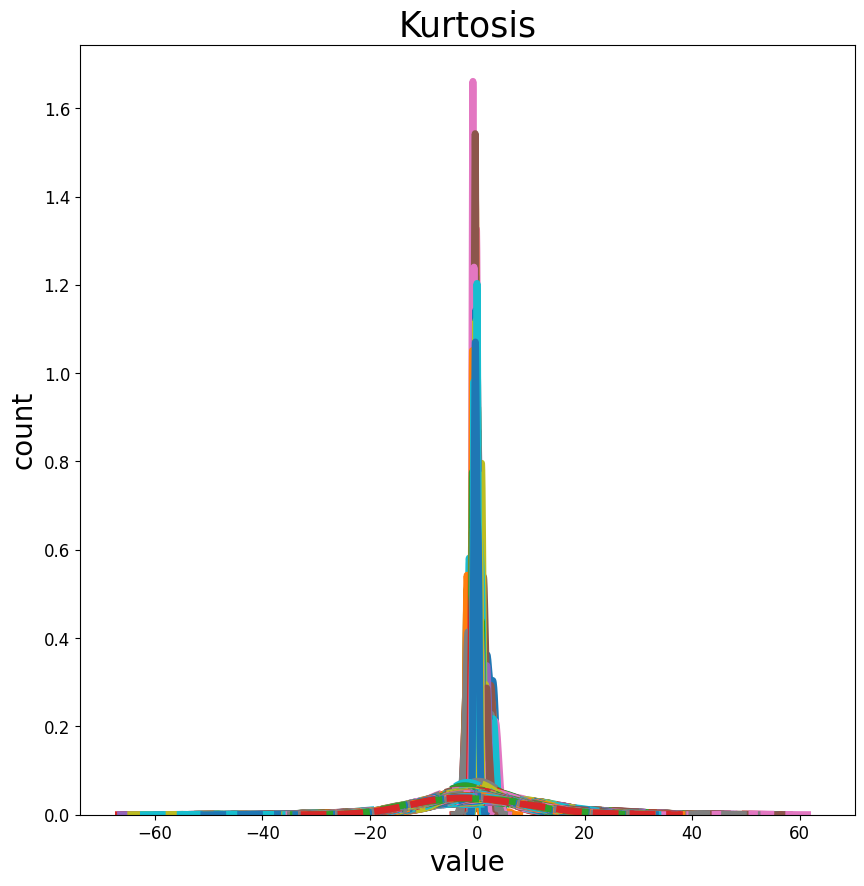

In [48]:
import seaborn as sns

#Un-mix signals using
unMixed = all_psds_prep.T.dot(independent_components)

# Subtract mean
unMixed = (unMixed.T - np.mean(unMixed.T, axis=1, keepdims=True)).T

fig, ax = plt.subplots(1, 1, figsize=(10,10))
for i in range(all_psds_prep.shape[0]):
    sns.kdeplot(all_psds_prep[i, :], lw=5, label='Mixed Kurtosis={}'.format(np.round(kurt(all_psds_prep[i, :])[0], decimals=1)))

for i in range(unMixed.shape[0]):   
    sns.kdeplot(unMixed[i, :], lw=5, ls='--', label='unMixed Kurtosis={}'.format(np.around(kurt(unMixed[i, :])[0], decimals=1)))

ax.tick_params(labelsize=12)
ax.set_xlabel('value', fontsize=20)
ax.set_ylabel('count', fontsize=20)
ax.set_title('Kurtosis', fontsize=25)
plt.show()

